In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [2]:
epochs = 14
train_batch_size = 100
test_batch_size = 1000

In [3]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [4]:
def train(model, train_loader, device, optimizer):
    model.train()
    for batch, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        
        output = model(data)
        loss = F.cross_entropy(output, target)
        
        loss.backward()
        optimizer.step()
        
#         if batch % 100 == 0:
#             print(f"Train Epoch: {epoch} [{batch * len(data)}/{len(train_loader.dataset)}({(100. * batch / len(train_loader)):.0f}%)] \tLoss: {loss.item():.6f}")
            
    print(f"\n Train Epoch: {epoch} \tLoss: {loss.item():.6f}")

In [5]:
def test(model, test_loader, device):
    model.eval()
    loss = 0
    correct = 0
    with torch.no_grad():
        for batch, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            
            loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    loss /= len(test_loader.dataset)

    print(f"\nTest set: Average loss: {loss:.6f}, Accuracy: {correct}/{len(test_loader.dataset)}({(100. * correct / len(test_loader.dataset)):.2f}%)\n")
    print('----------------------------------------------------')

In [6]:
train_set = torchvision.datasets.FashionMNIST('./data/FashionMNIST', 
                                              train = True,
                                              download = True,
                                             transform = transforms.Compose([
                                                 transforms.ToTensor()
                                             ]))

test_set = torchvision.datasets.FashionMNIST('./data/FashionMNIST', 
                                              train = False,
                                              download = True,
                                             transform = transforms.Compose([
                                                 transforms.ToTensor()
                                             ]))

In [7]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=train_batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size)

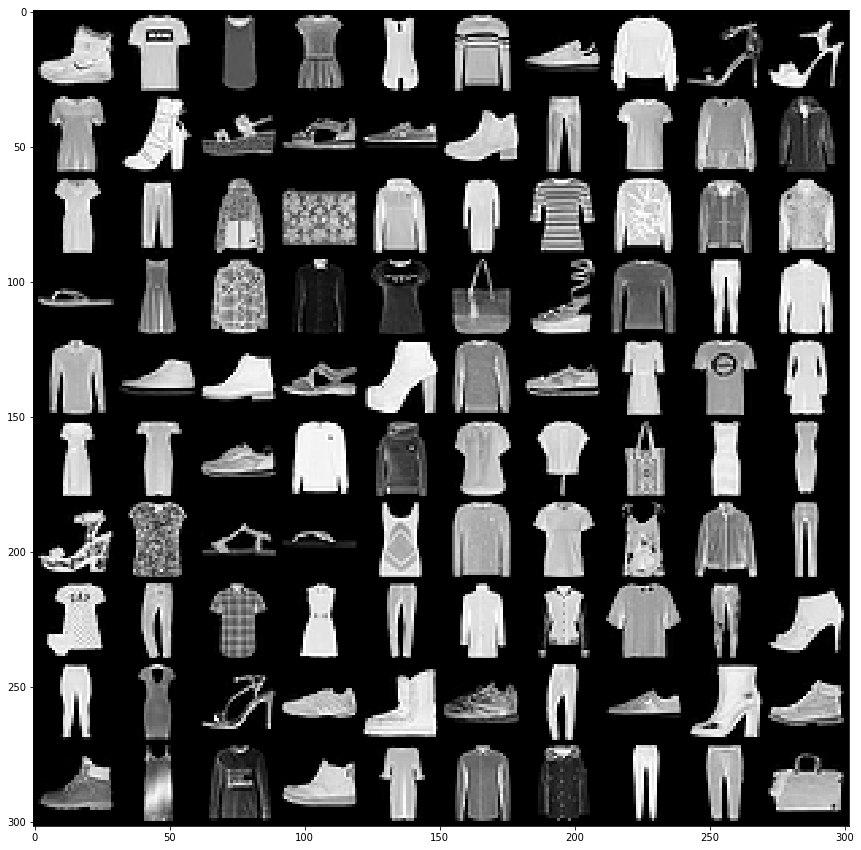

In [8]:
grid = torchvision.utils.make_grid(next(iter(train_loader))[0], nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
model = Network().to(device)
optimizer = optim.Adam(model.parameters(), lr=3e-3, weight_decay=0)

In [11]:
for epoch in range(1, epochs + 1):
    train(model, train_loader, device, optimizer)
    test(model, test_loader, device)


 Train Epoch: 1 	Loss: 0.249271

Test set: Average loss: 0.412013, Accuracy: 8583/10000(85.83%)

----------------------------------------------------

 Train Epoch: 2 	Loss: 0.209959

Test set: Average loss: 0.348113, Accuracy: 8857/10000(88.57%)

----------------------------------------------------

 Train Epoch: 3 	Loss: 0.201313

Test set: Average loss: 0.310340, Accuracy: 8946/10000(89.46%)

----------------------------------------------------

 Train Epoch: 4 	Loss: 0.236448

Test set: Average loss: 0.293351, Accuracy: 9008/10000(90.08%)

----------------------------------------------------

 Train Epoch: 5 	Loss: 0.235467

Test set: Average loss: 0.293373, Accuracy: 8960/10000(89.60%)

----------------------------------------------------

 Train Epoch: 6 	Loss: 0.147912

Test set: Average loss: 0.275945, Accuracy: 9040/10000(90.40%)

----------------------------------------------------

 Train Epoch: 7 	Loss: 0.185912

Test set: Average loss: 0.293868, Accuracy: 8976/10000(89.76